In [1]:
# importing essential libraries for data cleaning and EDA
import numpy as np
import pandas as pd

# for handling date time
import datetime as datetime

# stats and other libraries
import scipy.stats as stats

# plotting libraries
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

# for handling geographic data

# modeling libraries
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn import svm, tree

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score


import xgboost as xgb
from xgboost import XGBClassifier

import seaborn as sns
import scipy.stats as stats
import string
import warnings
warnings.filterwarnings('ignore')

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE



sns.set_style('ticks')
pd.set_option('display.max_columns', None)

%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# pip install imblearn

In [3]:
merged = pd.read_csv('../data/merged_data.csv',index_col='Unnamed: 0')
# merged.head()

In [4]:
merged.Station.value_counts()

2    7208
1    3298
Name: Station, dtype: int64

In [5]:
merged.Cluster.value_counts()

5.0     437
8.0     377
1.0     216
0.0     207
6.0     194
11.0    189
10.0    169
4.0     147
7.0     138
Name: Cluster, dtype: int64

## Feature Engineering

In [6]:
species_dummies = pd.get_dummies(merged.Species, drop_first=False)

In [7]:
merged = pd.concat([merged, species_dummies], axis=1)

In [8]:
# Species MIR Plots:
mir = merged.groupby(['year','month','week','Species']).sum().reset_index()
mir['mir'] = mir['WnvPresent']/mir['NumMosquitos']*1000
mir.head()

year  month  week                 Species    Latitude    Longitude  \
0  2007      5    22           CULEX PIPIENS   41.731922   -87.677512   
1  2007      5    22  CULEX PIPIENS/RESTUANS  377.233204  -789.377994   
2  2007      5    22          CULEX RESTUANS  627.956984 -1315.348752   
3  2007      6    23           CULEX PIPIENS  209.137334  -438.523790   
4  2007      6    23  CULEX PIPIENS/RESTUANS  837.429620 -1754.322955   

   AddressAccuracy  NumMosquitos  WnvPresent  Station  Tmax  Tmin  Tavg  \
0                8             1           0        2    88    65    77   
1               70            10           0       14   792   565   681   
2              120            29           0       27  1320   960  1146   
3               41             6           0        9   316   251   284   
4              167            28           0       31  1269   984  1131   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0      13        59       66         0.00        29.44     30.09          5.8   
1     105       527      590         0.00       264.76    270.89         52.2   
2     186       882      987         0.00       441.45    451.41         87.0   
3     -41       236      259         1.50       145.74    148.91         30.0   
4    -169       949     1031         6.75       582.66    595.69        115.0   

   ResultDir  AvgSpeed    Tmax_wkly    Tmin_wkly    Tavg_wkly  Depart_wkly  \
0         16       7.4    79.142857    56.428571    68.000000     5.714286   
1        152      63.0   712.285714   507.857143   612.000000    51.428571   
2        246     108.3  1187.142857   846.428571  1020.000000    85.714286   
3         17      40.0   388.571429   303.571429   347.857143    27.142857   
4         78     157.5  1554.285714  1214.285714  1391.428571   108.571429   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      50.571429     58.571429          0.152857         29.404286   
1     455.142857    527.142857          1.375714        264.638571   
2     758.571429    878.571429          2.292857        441.064286   
3     293.571429    312.142857          0.757143        145.392857   
4    1174.285714   1248.571429          3.028571        581.571429   

   SeaLevel_wkly  ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  \
0      30.125714          7.642857       16.571429       9.485714   
1     271.131429         68.785714      149.142857      85.371429   
2     451.885714        114.642857      248.571429     142.285714   
3     148.992857         34.642857       98.571429      41.642857   
4     595.971429        138.571429      394.285714     166.571429   

   Tmax_wkly_lag7  Tmin_wkly_lag7  Tavg_wkly_lag7  Depart_wkly_lag7  \
0       73.571429       46.714286       60.285714          0.142857   
1      662.142857      420.428571      542.571429          1.285714   
2     1103.571429      700.714286      904.285714          2.142857   
3      395.714286      282.142857      340.000000         28.571429   
4     1582.857143     1128.571429     1360.000000        114.285714   

   DewPoint_wkly_lag7  WetBulb_wkly_lag7  PrecipTotal_wkly_lag7  \
0           40.000000          49.714286               0.030000   
1          360.000000         447.428571               0.270000   
2          600.000000         745.714286               0.450000   
3          252.857143         292.857143               0.764286   
4         1011.428571        1171.428571               3.057143   

   StnPressure_wkly_lag7  SeaLevel_wkly_lag7  ResultSpeed_wkly_lag7  \
0              29.400000           30.122857               8.785714   
1             264.600000          271.105714              79.071429   
2             441.000000          451.842857             131.785714   
3             147.021429          150.628571              38.214286   
4             588.085714          602.514286             152.857143   

   ResultDir_wkly_lag7  AvgSpeed_wkly_lag7  Tmax_wkly_lag14  Tmi

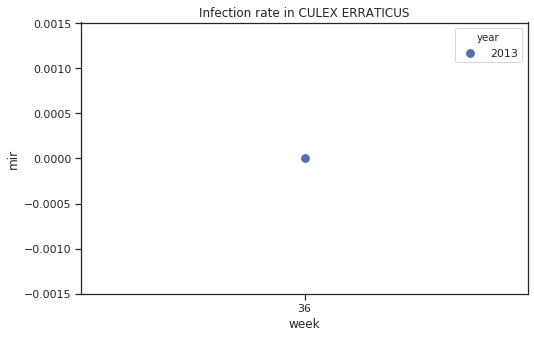

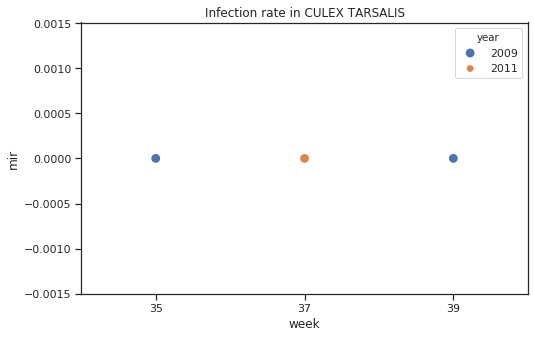

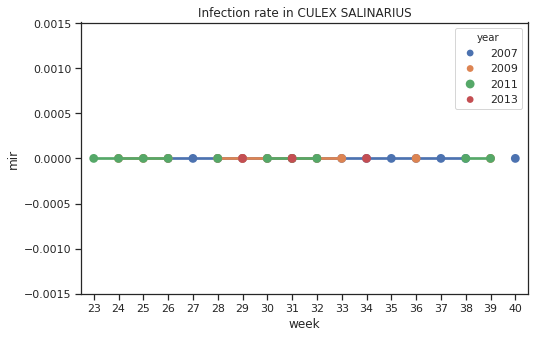

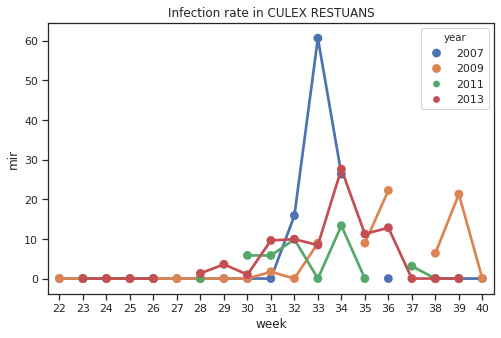

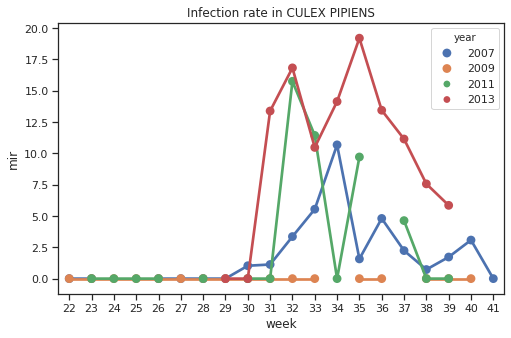

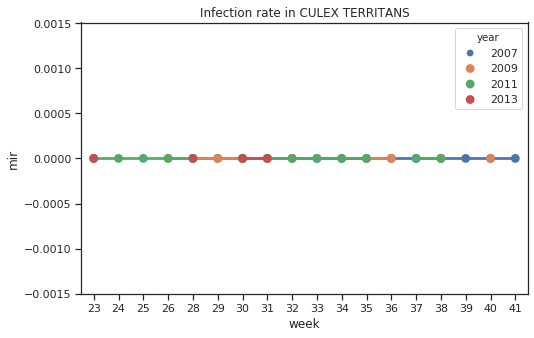

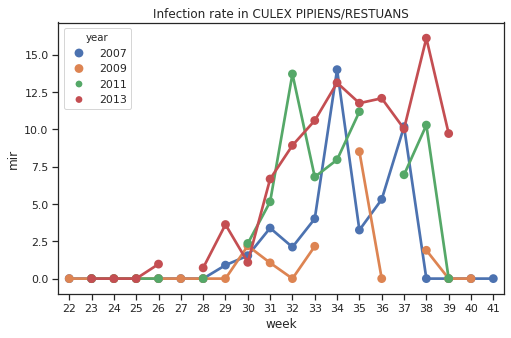

In [9]:
for species in set(mir.Species):
    plt.figure(figsize=(8,5))
    sns.pointplot(x='week', y='mir', data=mir[mir.Species==species], hue='year')
    plt.title(f'Infection rate in {species}')
    if species =='CULEX PIPIENS/RESTUANS':
        plt.savefig('../images/mir_CULEX_PIPIENS-RESTUANS.png')
    else:
        plt.savefig(f"../images/mir_{species}.png")
    plt.show()

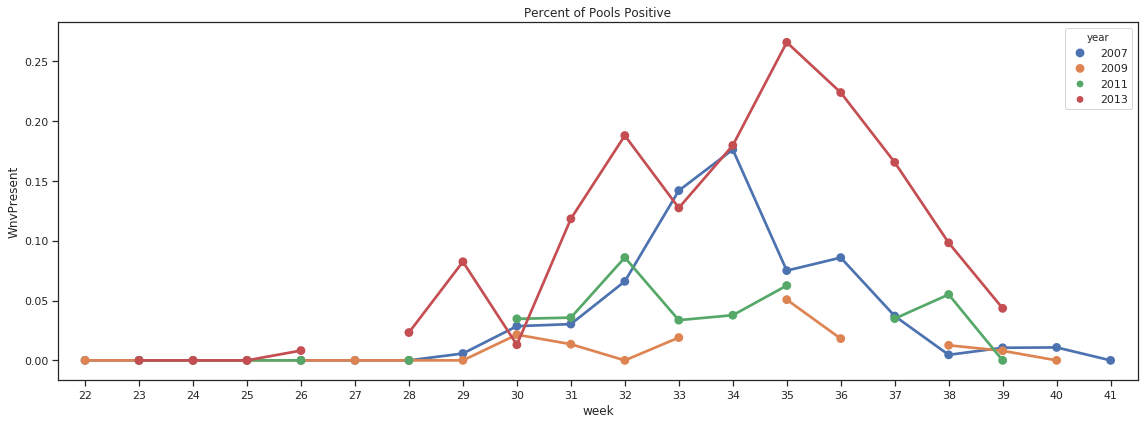

In [10]:
# Percent of Pools Positive Plot
train_mozzie=merged.groupby(['year','month','week']).mean().reset_index()
#train_mozzie.year=train_mozzie.year.map(lambda x:str(x))
train_mozzie.head()
plt.figure(figsize=(16,6))
sns.pointplot(x='week', y='WnvPresent', data=train_mozzie, hue='year')
plt.title('Percent of Pools Positive')
plt.tight_layout()
plt.savefig('../images/pct_pools_pos.png')


In [11]:
merged.head()

Test Date                 Species  Trap  \
0  2007-05-29  CULEX PIPIENS/RESTUANS  T002   
1  2007-05-29          CULEX RESTUANS  T002   
2  2007-05-29          CULEX RESTUANS  T007   
3  2007-05-29  CULEX PIPIENS/RESTUANS  T015   
4  2007-05-29          CULEX RESTUANS  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  Station  year  month  week  \
0             1           0        1  2007      5    22   
1             1           0        1  2007      5    22   
2             1           0        1  2007      5    22   
3             1           0        1  2007      5    22   
4             4           0        1  2007      5    22   

                    daylight  Tmax  Tmin  Tavg  Depart  DewPoint  WetBulb  \
0  0 days 14:56:00.000000000    88    60    74      10        58       65   
1  0 days 14:56:00.000000000    88    60    74      10        58       65   
2  0 days 14:56:00.000000000    88    60    74      10        58       65   
3  0 days 14:56:00.000000000    88    60    74      10        58       65   
4  0 days 14:56:00.000000000    88    60    74      10        58       65   

   PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  AvgSpeed  \
0          0.0        29.39     30.11          5.8         18       6.5   
1          0.0        29.39     30.11          5.8         18       6.5   
2          0.0        29.39     30.11          5.8         18       6.5   
3          0.0        29.39     30.11          5.8         18       6.5   
4          0.0        29.39     30.11          5.8         18       6.5   

   Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  DewPoint_wkly  WetBulb_wkly  \
0  79.142857  56.428571       68.0     5.714286      50.571429     58.571429   
1  79.142857  56.428571       68.0     5.714286      50.571429     58.571429   
2  79.142857  56.428571       68.0     5.714286      50.571429     58.571429   
3  79.142857  56.428571       68.0     5.714286      50.571429     58.571429   
4  79.142857  56.428571       68.0     5.714286      50.571429     58.571429   

   PrecipTotal_wkly  StnPressure_wkly  SeaLevel_wkly  ResultSpeed_wkly  \
0          0.152857         29.404286      30.125714          7.642857   
1          0.152857         29.404286      30.125714          7.642857   
2          0.152857         29.404286      30.125714          7.642857   
3          0.152857         29.404286      30.125714          7.642857   
4          0.152857         29.404286      30.125714          7.642857   

   ResultDir_wkly  AvgSpeed_wkly  Tmax_wkly_lag7  Tmin_wkly_lag7  \
0       16.571429       9.485714       73.571429       46.714286   
1       16.571429       9.485714       73.571429       46.714286   
2       16.571429       9.485714       73.571429       46.714286   
3       16.571429       9.485714       73.571429       46.714286   
4       16.571429       9.485714       73.571429       46.714286   

   Tavg_wkly_lag7  Depart_wkly_lag7  DewPoint_wkly_lag7  WetBulb_wkly_lag7  \
0       60.285714          0.142857                40.0          49.714286   
1       60.285714          0.142857                40.0          49.714286   
2       60.285714          0.142857                40.0          49.714286   
3       60.285714          0.142857                40.0          49.714286   
4       60.285714          0.142857                40.0          49.714286   

   PrecipTotal_wkly_lag7  StnPressure_wkly_lag7  SeaLevel_wkly_lag7  \
0                   0.03                   29.4           30.122857   
1                   0.03       

In [12]:
# merged.dtypes

In [13]:
merged['Test Date'] = pd.to_datetime(merged['Test Date'])
merged['Spray Date'] = pd.to_datetime(merged['Spray Date'])

In [14]:
merged['Days between Spray and Test'] = (merged['Test Date'] - merged['Spray Date']).dt.days - 7

In [15]:
merged['Has been Sprayed'] = np.where((merged['Days between Spray and Test'] > 0) & (merged['Days between Spray and Test'] < 30), 1, 0)

In [16]:
merged['Has been Sprayed'].value_counts()

0    10398
1      108
Name: Has been Sprayed, dtype: int64

In [17]:
merged['Hour'] = merged.daylight.str[-18:-16]
merged['Minute'] = merged.daylight.str[-15:-13]
merged['Second'] = merged.daylight.str[-12:-10]

In [18]:
merged['Hour'] = merged['Hour'].astype(float)
merged['Minute'] = merged['Minute'].astype(float)
merged['Second'] = merged['Second'].astype(float)

In [19]:
merged['Daylight Hours'] = round((merged.Hour + merged.Minute/60 + merged.Second/3600),0)

In [20]:
merged['Daylight Hours'].value_counts()

15.0    4122
14.0    3383
13.0    1573
12.0    1402
11.0      26
Name: Daylight Hours, dtype: int64

In [21]:
merged['Daylight Hours'].dtype

dtype('float64')

In [22]:
merged.head()

Test Date                 Species  Trap             AddressNumberAndStreet  \
0 2007-05-29  CULEX PIPIENS/RESTUANS  T002  4100  N OAK PARK AVE, Chicago, IL   
1 2007-05-29          CULEX RESTUANS  T002  4100  N OAK PARK AVE, Chicago, IL   
2 2007-05-29          CULEX RESTUANS  T007   6200  N MANDELL AVE, Chicago, IL   
3 2007-05-29  CULEX PIPIENS/RESTUANS  T015    7900  W FOSTER AVE, Chicago, IL   
4 2007-05-29          CULEX RESTUANS  T015    7900  W FOSTER AVE, Chicago, IL   

    Latitude  Longitude  AddressAccuracy  NumMosquitos  WnvPresent  Station  \
0  41.954690 -87.800991                9             1           0        1   
1  41.954690 -87.800991                9             1           0        1   
2  41.994991 -87.769279                9             1           0        1   
3  41.974089 -87.824812                8             1           0        1   
4  41.974089 -87.824812                8             4           0        1   

   year  month  week                   daylight  Tmax  Tmin  Tavg  Depart  \
0  2007      5    22  0 days 14:56:00.000000000    88    60    74      10   
1  2007      5    22  0 days 14:56:00.000000000    88    60    74      10   
2  2007      5    22  0 days 14:56:00.000000000    88    60    74      10   
3  2007      5    22  0 days 14:56:00.000000000    88    60    74      10   
4  2007      5    22  0 days 14:56:00.000000000    88    60    74      10   

   DewPoint  WetBulb  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0        58       65          0.0        29.39     30.11          5.8   
1        58       65          0.0        29.39     30.11          5.8   
2        58       65          0.0        29.39     30.11          5.8   
3        58       65          0.0        29.39     30.11          5.8   
4        58       65          0.0        29.39     30.11          5.8   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18       6.5  79.142857  56.428571       68.0     5.714286   
1         18       6.5  79.142857  56.428571       68.0     5.714286   
2         18       6.5  79.142857  56.428571       68.0     5.714286   
3         18       6.5  79.142857  56.428571       68.0     5.714286   
4         18       6.5  79.142857  56.428571       68.0     5.714286   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      50.571429     58.571429          0.152857         29.404286   
1      50.571429     58.571429          0.152857         29.404286   
2      50.571429     58.571429          0.152857         29.404286   
3      50.571429     58.571429          0.152857         29.404286   
4      50.571429     58.571429          0.152857         29.404286   

   SeaLevel_wkly  ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  \
0      30.125714          7.642857       16.571429       9.485714   
1      30.125714          7.642857       16.571429       9.485714   
2      30.125714          7.642857       16.571429       9.485714   
3      30.125714          7.642857       16.571429       9.485714   
4      30.125714          7.642857       16.571429       9.485714   

   Tmax_wkly_lag7  Tmin_wkly_lag7  Tavg_wkly_lag7  Depart_wkly_lag7  \
0       73.571429       46.714286       60.285714          0.142857   
1       73.571429       46.714286       60.285714          0.142857   
2       73.571429       46.714286       60.285714          0.142857   
3       73.571429       46.714286       60.285714          0.142857   
4       73.571429       46.714286       60.285714          0.142857   

   DewPoint_wkly_lag7  WetBulb_wkly_lag7  PrecipTotal_wkly_lag7  \
0                40.0          49.714286                   0.03   
1                40.0          49.714286                   0.03   
2                40.0          49.714286                   0.03   
3                40.0          49.714286                   0.03   
4                40.0          49.714286                   0.03   

   StnPressure_wkly_lag7  SeaLevel_wkly_

In [23]:
merged.to_csv('../data/merged.csv', index=False)

---

# Modeling

In [24]:
# Imports for Modeling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from operator import itemgetter

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Test/Train Split

### Selecting columns to include to X

In [25]:
merged.columns

Index(['Test Date', 'Species', 'Trap', 'AddressNumberAndStreet', 'Latitude',
       'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'Station',
       'year', 'month', 'week', 'daylight', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Tmax_wkly', 'Tmin_wkly',
       'Tavg_wkly', 'Depart_wkly', 'DewPoint_wkly', 'WetBulb_wkly',
       'PrecipTotal_wkly', 'StnPressure_wkly', 'SeaLevel_wkly',
       'ResultSpeed_wkly', 'ResultDir_wkly', 'AvgSpeed_wkly', 'Tmax_wkly_lag7',
       'Tmin_wkly_lag7', 'Tavg_wkly_lag7', 'Depart_wkly_lag7',
       'DewPoint_wkly_lag7', 'WetBulb_wkly_lag7', 'PrecipTotal_wkly_lag7',
       'StnPressure_wkly_lag7', 'SeaLevel_wkly_lag7', 'ResultSpeed_wkly_lag7',
       'ResultDir_wkly_lag7', 'AvgSpeed_wkly_lag7', 'Tmax_wkly_lag14',
       'Tmin_wkly_lag14', 'Tavg_wkly_lag14', 'Depart_wkly_lag14',
       'DewPoint_wkly_lag14', 'WetBulb_wkly_lag14', 'P

In [26]:
features_selected = ['Latitude',
       'Longitude', 'AddressAccuracy', 'year', 'month', 'week','Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'PrecipTotal', 'StnPressure',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Tmax_wkly', 'Tmin_wkly',
       'Tavg_wkly', 'Depart_wkly', 'DewPoint_wkly', 'WetBulb_wkly',
       'PrecipTotal_wkly', 'StnPressure_wkly',
       'ResultSpeed_wkly', 'ResultDir_wkly', 'AvgSpeed_wkly','CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS',
       'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TARSALIS',
       'CULEX TERRITANS', 'Daylight Hours',
       'Days between Spray and Test', 
       'Has been Sprayed','NumMosquitos', 'WnvPresent']

In [27]:
train = merged[features_selected]
train.head()

Latitude  Longitude  AddressAccuracy  year  month  week  Tmax  Tmin  Tavg  \
0  41.954690 -87.800991                9  2007      5    22    88    60    74   
1  41.954690 -87.800991                9  2007      5    22    88    60    74   
2  41.994991 -87.769279                9  2007      5    22    88    60    74   
3  41.974089 -87.824812                8  2007      5    22    88    60    74   
4  41.974089 -87.824812                8  2007      5    22    88    60    74   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  ResultSpeed  \
0      10        58       65          0.0        29.39          5.8   
1      10        58       65          0.0        29.39          5.8   
2      10        58       65          0.0        29.39          5.8   
3      10        58       65          0.0        29.39          5.8   
4      10        58       65          0.0        29.39          5.8   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18       6.5  79.142857  56.428571       68.0     5.714286   
1         18       6.5  79.142857  56.428571       68.0     5.714286   
2         18       6.5  79.142857  56.428571       68.0     5.714286   
3         18       6.5  79.142857  56.428571       68.0     5.714286   
4         18       6.5  79.142857  56.428571       68.0     5.714286   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      50.571429     58.571429          0.152857         29.404286   
1      50.571429     58.571429          0.152857         29.404286   
2      50.571429     58.571429          0.152857         29.404286   
3      50.571429     58.571429          0.152857         29.404286   
4      50.571429     58.571429          0.152857         29.404286   

   ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  CULEX ERRATICUS  \
0          7.642857       16.571429       9.485714                0   
1          7.642857       16.571429       9.485714                0   
2          7.642857       16.571429       9.485714                0   
3          7.642857       16.571429       9.485714                0   
4          7.642857       16.571429       9.485714                0   

   CULEX PIPIENS  CULEX PIPIENS/RESTUANS  CULEX RESTUANS  CULEX SALINARIUS  \
0              0                       1               0                 0   
1              0                       0               1                 0   
2              0                       0               1                 0   
3              0                       1               0                 0   
4              0                       0               1                 0   

   CULEX TARSALIS  CULEX TERRITANS  Daylight Hours  \
0               0                0            15.0   
1               0                0            15.0   
2               0                0            15.0   
3               0                0            15.0   
4               0                0            15.0   

   Days between Spray and Test  Has been Sprayed  NumMosquitos  WnvPresent  
0                          NaN                 0             1           0  
1                          NaN                 0             1           0  
2                          NaN                 0             1           0  
3                      -1509.0                 0             1           0  
4                      -1509.0                 0             4           0

In [28]:
train.isnull().sum().tail()

Daylight Hours                    0
Days between Spray and Test    8432
Has been Sprayed                  0
NumMosquitos                      0
WnvPresent                        0
dtype: int64

In [29]:
train['Days between Spray and Test'].fillna(0, inplace=True)

In [30]:
train.isnull().sum().tail()

Daylight Hours                 0
Days between Spray and Test    0
Has been Sprayed               0
NumMosquitos                   0
WnvPresent                     0
dtype: int64

In [31]:
train.dtypes.tail()

Daylight Hours                 float64
Days between Spray and Test    float64
Has been Sprayed                 int64
NumMosquitos                     int64
WnvPresent                       int64
dtype: object

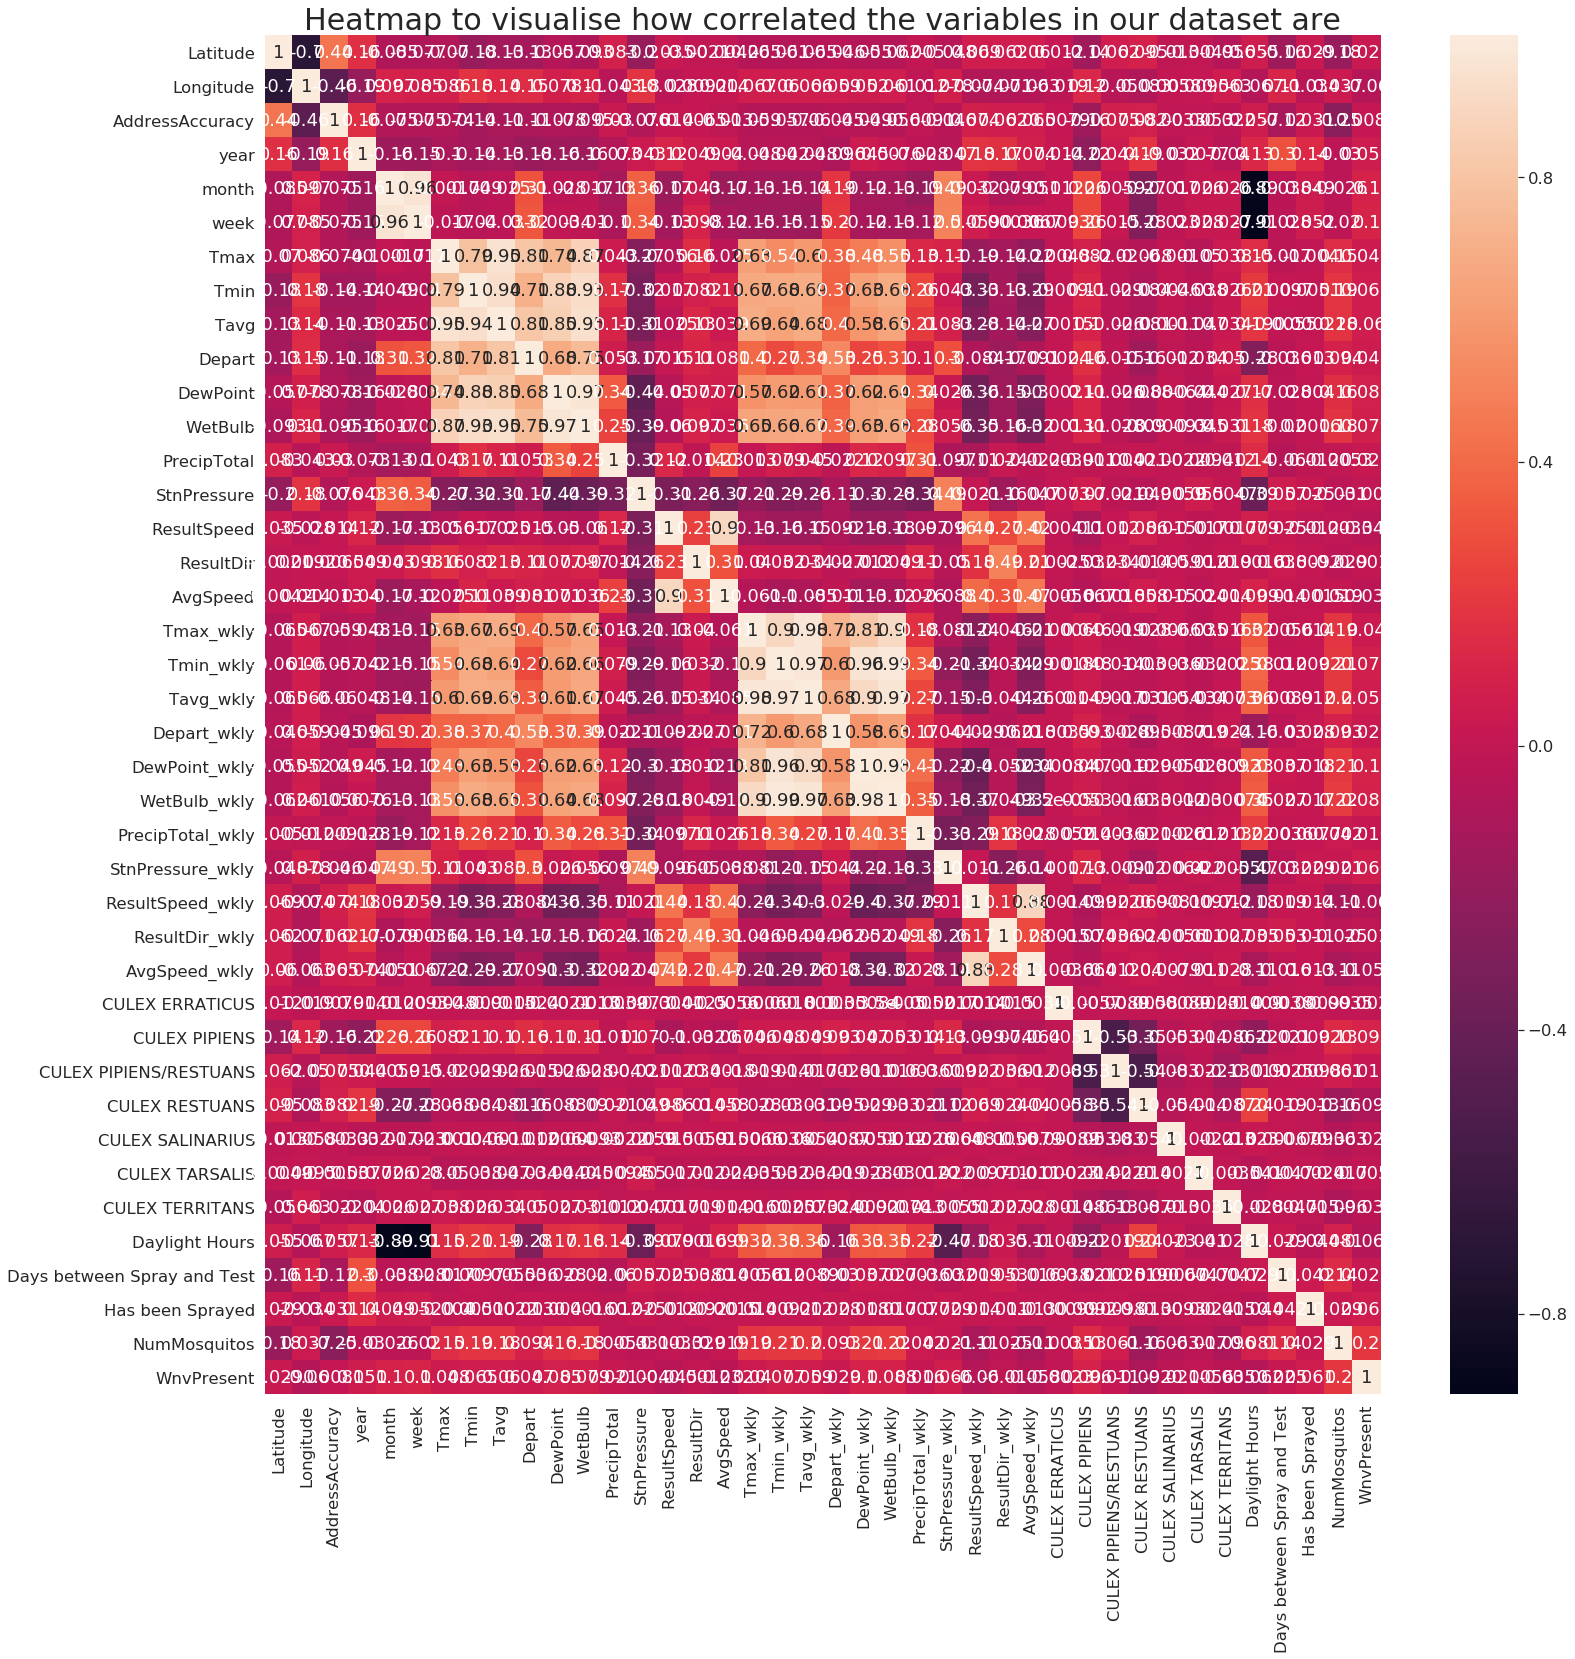

In [32]:
sns.set(font_scale=1.5)
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(), annot = True);
plt.title("Heatmap to visualise how correlated the variables in our dataset are", fontsize=30);

In [33]:
X = train.drop(columns=['WnvPresent', 'NumMosquitos'])
y = train['WnvPresent']

In [34]:
X.head()

Latitude  Longitude  AddressAccuracy  year  month  week  Tmax  Tmin  Tavg  \
0  41.954690 -87.800991                9  2007      5    22    88    60    74   
1  41.954690 -87.800991                9  2007      5    22    88    60    74   
2  41.994991 -87.769279                9  2007      5    22    88    60    74   
3  41.974089 -87.824812                8  2007      5    22    88    60    74   
4  41.974089 -87.824812                8  2007      5    22    88    60    74   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  ResultSpeed  \
0      10        58       65          0.0        29.39          5.8   
1      10        58       65          0.0        29.39          5.8   
2      10        58       65          0.0        29.39          5.8   
3      10        58       65          0.0        29.39          5.8   
4      10        58       65          0.0        29.39          5.8   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18       6.5  79.142857  56.428571       68.0     5.714286   
1         18       6.5  79.142857  56.428571       68.0     5.714286   
2         18       6.5  79.142857  56.428571       68.0     5.714286   
3         18       6.5  79.142857  56.428571       68.0     5.714286   
4         18       6.5  79.142857  56.428571       68.0     5.714286   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      50.571429     58.571429          0.152857         29.404286   
1      50.571429     58.571429          0.152857         29.404286   
2      50.571429     58.571429          0.152857         29.404286   
3      50.571429     58.571429          0.152857         29.404286   
4      50.571429     58.571429          0.152857         29.404286   

   ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  CULEX ERRATICUS  \
0          7.642857       16.571429       9.485714                0   
1          7.642857       16.571429       9.485714                0   
2          7.642857       16.571429       9.485714                0   
3          7.642857       16.571429       9.485714                0   
4          7.642857       16.571429       9.485714                0   

   CULEX PIPIENS  CULEX PIPIENS/RESTUANS  CULEX RESTUANS  CULEX SALINARIUS  \
0              0                       1               0                 0   
1              0                       0               1                 0   
2              0                       0               1                 0   
3              0                       1               0                 0   
4              0                       0               1                 0   

   CULEX TARSALIS  CULEX TERRITANS  Daylight Hours  \
0               0                0            15.0   
1               0                0            15.0   
2               0                0            15.0   
3               0                0            15.0   
4               0                0            15.0   

   Days between Spray and Test  Has been Sprayed  
0                          0.0                 0  
1                          0.0                 0  
2                          0.0                 0  
3                      -1509.0                 0  
4                      -1509.0                 0

In [35]:
X.shape

(10506, 38)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

In [37]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

### Balance Classes by: Oversampling (SMOTE)

In [38]:
# Oversampling on training data only
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(Xs_train, y_train)

In [39]:
print(X_res.shape)
print(y_res.shape)

(13936, 38)
(13936,)


In [40]:
model = []
parameters = []
scores = []
precision = []
recall = []
ra_score = []

# To put the name of model, models from sklearn, and hyperparameters of the model we want to search through in order

names = ['Decision Tree', 'RandomForest', 'LogReg','KNN','SVC','AdaBoost', 'BaggingClass', 'GradientBoost']

estimators = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
             SVC(), AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

In [41]:
params = [
    {'clf__max_depth': [None, 10, 15, 20, 30, 35],
    'clf__min_samples_split': [5,10,15,20,25,30]}, #DecisionTree

    {'clf__max_depth': [None,50,75,100,150,200],
     'clf__min_samples_split': [5,10,15,20,30]}, #RandomForest
    
    {'clf__C':[1,3,5,10],
     'clf__solver':['lbfgs', 'liblinear', 'sag', 'saga'],
     'clf__max_iter':[50,100,125,150,175,200]}, #LogisticRegression
    
    {'clf__n_neighbors':[3,5,10,15,20,25],
     'clf__weights':['uniform','distance'],
     'clf__p':[1,2,3]}, #KNeighborsClassifier
    
    {'clf__kernel':['rbf']}, #SVC - 'something wrong with 'sigmoid','poly','linear'
    
    {'clf__n_estimators':[25,40,50,100,200,500]}, #AdaBoost
    
    {'clf__n_estimators':[10,30,50,100],
     'clf__max_samples':[1,5,10],
     'clf__max_features':[1,5,10]}, #BaggingClassifier
    
    {'clf__loss' : ['deviance', 'exponential'],
     'clf__n_estimators':[50,75,100,200,500],
     'clf__max_features': [None, 'auto','sqrt','log2']} #GradientBoosting
]

In [42]:
for name, estimator, param in zip(names, estimators, params):
    clf_pipe = Pipeline([
        # not sure if we need to scale the X
        # removed ('ss', StandardScaler),
        ('clf', estimator)
    ])
#     cv = StratifiedKFold(shuffle=True, n_splits=3)
    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    gs = GridSearchCV(clf_pipe, param_grid=param, cv=cv, verbose=10, n_jobs=-1)
    gs.fit(X_res, y_res)
    
    print(name)
    print('Best Score: {}'.format(gs.best_score_))
    print('Best Params: {}'.format(gs.best_params_))
    
    # Best Model
    grid_model = gs.best_estimator_
    
    print('Model Score on X_train: {}'.format(grid_model.score(X_train, y_train)))
    
    # Prediction and score
    pred = grid_model.predict(X_test)
    print('Accuracy score of prediction: {}'.format(accuracy_score(y_test, pred)))
    
    
    # Confusion Matrix 
    conf_matrix = confusion_matrix(y_test, pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    print('TN: {}, FP:{}, FN:{}, TP:{}'.format(tn,fp,fn,tp))
    print('Precision of the model is {}'. format(tp/(tp+fp)))
    print('Recall of the model is {}'.format(tp/(tp+fn)))
    
    #roc_auc
    ra = roc_auc_score(y_test, pred)
    print ('ROC_AUC: {}'.format(ra))
   
    
    print('\n')
    model.append(name)
    parameters.append(gs.best_params_)
    scores.append(accuracy_score(y_test, pred))
    recall.append(tp/(tp+fn))
    precision.append(tp/(tp+fp))
    ra_score.append(ra) 

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:    3.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    3.2s finished


Decision Tree
Best Score: 0.9350789096126255
Best Params: {'clf__max_depth': None, 'clf__min_samples_split': 5}
Model Score on X_train: 0.05248844166440032
Accuracy score of prediction: 0.052347715736040606
TN: 0, FP:2987, FN:0, TP:165
Precision of the model is 0.052347715736040606
Recall of the model is 1.0
ROC_AUC: 0.5


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  77 out of  90 | elapsed:   19.5s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  87 out of  90 | elapsed:   21.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   21.6s finished


RandomForest
Best Score: 0.9524151123864181
Best Params: {'clf__max_depth': None, 'clf__min_samples_split': 5}
Model Score on X_train: 0.9316018493336959
Accuracy score of prediction: 0.9311548223350253
TN: 2933, FP:54, FN:163, TP:2
Precision of the model is 0.03571428571428571
Recall of the model is 0.012121212121212121
ROC_AUC: 0.4970214363250855


Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1683s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0522s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   15.4s
[Parallel(n_j

LogReg
Best Score: 0.7826398852223816
Best Params: {'clf__C': 5, 'clf__max_iter': 50, 'clf__solver': 'liblinear'}
Model Score on X_train: 0.05248844166440032
Accuracy score of prediction: 0.052347715736040606
TN: 0, FP:2987, FN:0, TP:165
Precision of the model is 0.052347715736040606
Recall of the model is 1.0
ROC_AUC: 0.5


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:  3.0min remaining:   22.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  4.4min finished


KNN
Best Score: 0.9349593495934959
Best Params: {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'distance'}
Model Score on X_train: 0.26883328800652706
Accuracy score of prediction: 0.26776649746192893
TN: 731, FP:2256, FN:52, TP:113
Precision of the model is 0.047699451245251163
Recall of the model is 0.6848484848484848
ROC_AUC: 0.4647878179180489


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.1s finished


SVC
Best Score: 0.8634624581539933
Best Params: {'clf__kernel': 'rbf'}
Model Score on X_train: 0.9475115583355996
Accuracy score of prediction: 0.9476522842639594
TN: 2987, FP:0, FN:165, TP:0
Precision of the model is nan
Recall of the model is 0.0
ROC_AUC: 0.5


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    0.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    1.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:    1.7s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    3.6s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    5.9s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    6.5s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   12.0s finished


AdaBoost
Best Score: 0.916547106647537
Best Params: {'clf__n_estimators': 500}
Model Score on X_train: 0.9475115583355996
Accuracy score of prediction: 0.9476522842639594
TN: 2987, FP:0, FN:165, TP:0
Precision of the model is nan
Recall of the model is 0.0
ROC_AUC: 0.5


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0438s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  85 out of 108 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:    2.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    2.8s finished


BaggingClass
Best Score: 0.7263271162123385
Best Params: {'clf__max_features': 10, 'clf__max_samples': 10, 'clf__n_estimators': 100}
Model Score on X_train: 0.05248844166440032
Accuracy score of prediction: 0.052347715736040606
TN: 0, FP:2987, FN:0, TP:165
Precision of the model is 0.052347715736040606
Recall of the model is 1.0
ROC_AUC: 0.5


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 110 out of 120 | elapsed:  1.4min remaining:    7.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.5min finished


GradientBoost
Best Score: 0.9483500717360115
Best Params: {'clf__loss': 'deviance', 'clf__max_features': None, 'clf__n_estimators': 500}
Model Score on X_train: 0.05248844166440032
Accuracy score of prediction: 0.052347715736040606
TN: 0, FP:2987, FN:0, TP:165
Precision of the model is 0.052347715736040606
Recall of the model is 1.0
ROC_AUC: 0.5




In [43]:
results = pd.DataFrame({'model': model, 
              'parameters': parameters, 
              'scores': scores, 
              'recall': recall, 
              'precision': precision,
              'roc_auc':ra_score
                       })
results

model                                         parameters    scores  \
0  Decision Tree  {'clf__max_depth': None, 'clf__min_samples_spl...  0.052348   
1   RandomForest  {'clf__max_depth': None, 'clf__min_samples_spl...  0.931155   
2         LogReg  {'clf__C': 5, 'clf__max_iter': 50, 'clf__solve...  0.052348   
3            KNN  {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__wei...  0.267766   
4            SVC                             {'clf__kernel': 'rbf'}  0.947652   
5       AdaBoost                         {'clf__n_estimators': 500}  0.947652   
6   BaggingClass  {'clf__max_features': 10, 'clf__max_samples': ...  0.052348   
7  GradientBoost  {'clf__loss': 'deviance', 'clf__max_features':...  0.052348   

     recall  precision   roc_auc  
0  1.000000   0.052348  0.500000  
1  0.012121   0.035714  0.497021  
2  1.000000   0.052348  0.500000  
3  0.684848   0.047699  0.464788  
4  0.000000        NaN  0.500000  
5  0.000000        NaN  0.500000  
6  1.000000   0.052348  0.500000  
7  1.000000   0.052348  0.500000

### The following section is added to check the predict_proba scores

#### P/S: wasn't able to add this into the loop, so it was done manually instead

In [44]:
estimators = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
             SVC(), AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

In [45]:
model = DecisionTreeClassifier(max_depth = 5 , min_samples_split=25)
DTC = model.fit(X_train, y_train)
pred = DTC.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.7774081626441854

plt.figure(figsize=(50,50))
tree.plot_tree(model, feature_names=X_train.columns);

In [47]:
model = RandomForestClassifier(max_depth = 100 , min_samples_split=30)
RF = model.fit(X_train, y_train)
pred = RF.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8162096356940682

In [48]:
model = LogisticRegression(C=3, max_iter=175 , solver='lbfgs')
LogReg = model.fit(X_train, y_train)
pred = LogReg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.759219242982216

In [49]:
model = KNeighborsClassifier(n_neighbors=25, p=2, weights='uniform')
Knn = model.fit(X_train, y_train)
pred = Knn.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.7619522983433262

In [50]:
model = SVC(kernel='rbf', probability=True)
svc = model.fit(X_train, y_train)
pred = svc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.31642166560144463

In [51]:
model = AdaBoostClassifier(n_estimators=25)
Ada = model.fit(X_train, y_train)
pred = Ada.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.832707388582849

In [52]:
model = GradientBoostingClassifier(loss='exponential', max_features='log2', n_estimators=200)
GB = model.fit(X_train, y_train)
pred = GB.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8428056933580871

In [53]:
def eval_sklearn_model(y_true, predictions, model=None, X=None):
    """This function takes the true values for y and the predictions made by the model and prints out the confusion matrix along with Accuracy, Precision, and, if model and X provided, Roc_Auc Scores."""
    cnf_matrix = confusion_matrix(y_true, predictions)
#     print('True Negative: ', cnf_matrix[0, 0], '| False Positive: ', cnf_matrix[0, 1])
#     print('False Negative: ', cnf_matrix[1, 0], '| True Positive: ' cnf_matrix[1, 1], ‘\n’)
    sensitivity = cnf_matrix[1, 1]/ (cnf_matrix[1, 0] + cnf_matrix[1, 1])
    specificity = cnf_matrix[0, 0]/ (cnf_matrix[0, 1] + cnf_matrix[0, 0])
#     print('Sensitivity (TP/ TP + FN): ’, sensitivity)
#     print('Specificity (TN/ TN + FP): ‘, specificity, ‘\n’)
#     print('Accuracy: ’, accuracy_score(y_true, predictions, normalize=True))
#     print('Precision: ’, precision_score(y_true, predictions))
    if model != None:
        print('Roc-Auc: ', roc_auc_score(y_true, [x[1] for x in model.predict_proba(X)]))
    else:
        pass
    print('\n')

xgb = XGBClassifier(scale_pos_weight=(6969/385), objective='binary:logistic')
xgb.fit(X_train, y_train)
test_predictions = xgb.predict(X_test)
eval_sklearn_model(y_test, test_predictions, model=xgb, X=X_test)

Roc-Auc:  0.836508709458157




### Use this as our final model

In [54]:
#use this final model

model = GradientBoostingClassifier(loss='exponential', max_features='log2', n_estimators=200)
GB = model.fit(X_train, y_train)
pred = GB.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8391129236793784

### Preprocessing the same way for the test set

In [55]:
test2 = pd.read_csv('../data/merged_test.csv', index_col='Unnamed: 0')

In [56]:
test2.head(2)

Id   Test Date                 Species  Trap  \
0   1  2008-06-11  CULEX PIPIENS/RESTUANS  T002   
1   2  2008-06-11          CULEX RESTUANS  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  year  month  week                   daylight  Tmax  Tmin  Tavg  \
0        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   
1        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0       7        56       64          0.0        29.28     29.99          8.9   
1       7        56       64          0.0        29.28     29.99          8.9   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18      10.0  83.285714  64.428571  74.142857          8.0   
1         18      10.0  83.285714  64.428571  74.142857          8.0   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      64.428571     68.142857          0.304286         29.128571   
1      64.428571     68.142857          0.304286         29.128571   

   SeaLevel_wkly  ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  \
0      29.832857              10.8       20.285714           12.6   
1      29.832857              10.8       20.285714           12.6   

   Tmax_wkly_lag7  Tmin_wkly_lag7  Tavg_wkly_lag7  Depart_wkly_lag7  \
0       75.714286       53.428571       64.714286          0.714286   
1       75.714286       53.428571       64.714286          0.714286   

   DewPoint_wkly_lag7  WetBulb_wkly_lag7  PrecipTotal_wkly_lag7  \
0           52.142857          57.714286               0.132857   
1           52.142857          57.714286               0.132857   

   StnPressure_wkly_lag7  SeaLevel_wkly_lag7  ResultSpeed_wkly_lag7  \
0              29.111429           29.842857               5.857143   
1              29.111429           29.842857               5.857143   

   ResultDir_wkly_lag7  AvgSpeed_wkly_lag7  Tmax_wkly_lag14  Tmin_wkly_lag14  \
0            12.285714                 7.3        64.857143        43.857143   
1            12.285714                 7.3        64.857143        43.857143   

   Tavg_wkly_lag14  Depart_wkly_lag14  DewPoint_wkly_lag14  \
0        54.571429          -7.285714                 42.0   
1        54.571429          -7.285714                 42.0   

   WetBulb_wkly_lag14  PrecipTotal_wkly_lag14  StnPressure_wkly_lag14  \
0           49.142857                0.068571               29.354286   
1           49.142857                0.068571               29.354286   

   SeaLevel_wkly_lag14  ResultSpeed_wkly_lag14  ResultDir_wkly_lag14  \
0            30.072857               10.114286              9.571429   
1            30.072857               10.114286              9.571429   

   AvgSpeed_wkly_lag14  Tmax_wkly_lag21  Tmin_wkly_lag21  Tavg_wkly_lag21  \
0            11.542857        64.285714        43.857143        54.428571   
1            11.542857        64.285714        43.857143        54.428571   

   Depart_wkly_lag21  DewPoint_wkly_lag21  WetBulb_wkly_lag21  \
0          -5.285714            37.714286           46.857143   
1          -5.285714            37.714286           46.857143   

   PrecipTotal_wkly_lag21  StnPressure_wkly_lag21  SeaLevel_wkly_lag21  \
0                0.017143               29.018571            29.744286   
1                0.017143               29.018571            29.744286   

   ResultSpeed_wkly_lag21  ResultDir_wkly_lag21  AvgSpeed_wkly_lag21  \
0                7.214286             23.428571             9.185714   
1                7.214286             23.428571             9.185714   

   midpt_Lat  midpt_Lon  Cluster Spray Date  CULEX ERRATICUS  CULEX PIPIENS  \
0        NaN        NaN      NaN        NaN              

In [57]:
features_selected.remove('WnvPresent')
features_selected.remove('NumMosquitos')

In [58]:
X = test2[features_selected]
X.head()

Latitude  Longitude  AddressAccuracy  year  month  week  Tmax  Tmin  Tavg  \
0  41.95469 -87.800991                9  2008      6    24    86    61    74   
1  41.95469 -87.800991                9  2008      6    24    86    61    74   
2  41.95469 -87.800991                9  2008      6    24    86    61    74   
3  41.95469 -87.800991                9  2008      6    24    86    61    74   
4  41.95469 -87.800991                9  2008      6    24    86    61    74   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  ResultSpeed  \
0       7        56       64          0.0        29.28          8.9   
1       7        56       64          0.0        29.28          8.9   
2       7        56       64          0.0        29.28          8.9   
3       7        56       64          0.0        29.28          8.9   
4       7        56       64          0.0        29.28          8.9   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18      10.0  83.285714  64.428571  74.142857          8.0   
1         18      10.0  83.285714  64.428571  74.142857          8.0   
2         18      10.0  83.285714  64.428571  74.142857          8.0   
3         18      10.0  83.285714  64.428571  74.142857          8.0   
4         18      10.0  83.285714  64.428571  74.142857          8.0   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      64.428571     68.142857          0.304286         29.128571   
1      64.428571     68.142857          0.304286         29.128571   
2      64.428571     68.142857          0.304286         29.128571   
3      64.428571     68.142857          0.304286         29.128571   
4      64.428571     68.142857          0.304286         29.128571   

   ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  CULEX ERRATICUS  \
0              10.8       20.285714           12.6                0   
1              10.8       20.285714           12.6                0   
2              10.8       20.285714           12.6                0   
3              10.8       20.285714           12.6                0   
4              10.8       20.285714           12.6                0   

   CULEX PIPIENS  CULEX PIPIENS/RESTUANS  CULEX RESTUANS  CULEX SALINARIUS  \
0              0                       1               0                 0   
1              0                       0               1                 0   
2              1                       0               0                 0   
3              0                       0               0                 1   
4              0                       0               0                 0   

   CULEX TARSALIS  CULEX TERRITANS  Daylight Hours  \
0               0                0            15.0   
1               0                0            15.0   
2               0                0            15.0   
3               0                0            15.0   
4               0                1            15.0   

   Days between Spray and Test  Has been Sprayed  
0                          NaN                 0  
1                          NaN                 0  
2                          NaN                 0  
3                          NaN                 0  
4                          NaN                 0

In [59]:
X.isnull().sum()

Latitude                           0
Longitude                          0
AddressAccuracy                    0
year                               0
month                              0
week                               0
Tmax                               0
Tmin                               0
Tavg                               0
Depart                             0
DewPoint                           0
WetBulb                            0
PrecipTotal                        0
StnPressure                        0
ResultSpeed                        0
ResultDir                          0
AvgSpeed                           0
Tmax_wkly                          0
Tmin_wkly                          0
Tavg_wkly                          0
Depart_wkly                        0
DewPoint_wkly                      0
WetBulb_wkly                       0
PrecipTotal_wkly                   0
StnPressure_wkly                   0
ResultSpeed_wkly                   0
ResultDir_wkly                     0
A

In [60]:
X['Days between Spray and Test'] = X['Days between Spray and Test'].fillna(0)

In [61]:
final_pred = model.predict_proba(X)[:,1]

In [62]:
final_pred.shape

(116293,)

### From the final prediction, combine to create a new database for submission

In [63]:
sample = pd.read_csv('../data/sampleSubmission.csv')
sub = pd.DataFrame()
sub['Id']=sample['Id']
sub['WnvPresent'] = final_pred
print(sub.shape)
sub.head()

(116293, 2)


Id  WnvPresent
0   1    0.000810
1   2    0.000720
2   3    0.000933
3   4    0.000145
4   5    0.000047

In [64]:
sub.to_csv('../data/kaggleSubmission.csv',index=False)

### To visualise the location with the probability of virus happnening

In [65]:
test2.head()

Id   Test Date                 Species  Trap  \
0   1  2008-06-11  CULEX PIPIENS/RESTUANS  T002   
1   2  2008-06-11          CULEX RESTUANS  T002   
2   3  2008-06-11           CULEX PIPIENS  T002   
3   4  2008-06-11        CULEX SALINARIUS  T002   
4   5  2008-06-11         CULEX TERRITANS  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   Station  year  month  week                   daylight  Tmax  Tmin  Tavg  \
0        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   
1        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   
2        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   
3        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   
4        1  2008      6    24  0 days 15:10:00.000000000    86    61    74   

   Depart  DewPoint  WetBulb  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  \
0       7        56       64          0.0        29.28     29.99          8.9   
1       7        56       64          0.0        29.28     29.99          8.9   
2       7        56       64          0.0        29.28     29.99          8.9   
3       7        56       64          0.0        29.28     29.99          8.9   
4       7        56       64          0.0        29.28     29.99          8.9   

   ResultDir  AvgSpeed  Tmax_wkly  Tmin_wkly  Tavg_wkly  Depart_wkly  \
0         18      10.0  83.285714  64.428571  74.142857          8.0   
1         18      10.0  83.285714  64.428571  74.142857          8.0   
2         18      10.0  83.285714  64.428571  74.142857          8.0   
3         18      10.0  83.285714  64.428571  74.142857          8.0   
4         18      10.0  83.285714  64.428571  74.142857          8.0   

   DewPoint_wkly  WetBulb_wkly  PrecipTotal_wkly  StnPressure_wkly  \
0      64.428571     68.142857          0.304286         29.128571   
1      64.428571     68.142857          0.304286         29.128571   
2      64.428571     68.142857          0.304286         29.128571   
3      64.428571     68.142857          0.304286         29.128571   
4      64.428571     68.142857          0.304286         29.128571   

   SeaLevel_wkly  ResultSpeed_wkly  ResultDir_wkly  AvgSpeed_wkly  \
0      29.832857              10.8       20.285714           12.6   
1      29.832857              10.8       20.285714           12.6   
2      29.832857              10.8       20.285714           12.6   
3      29.832857              10.8       20.285714           12.6   
4      29.832857              10.8       20.285714           12.6   

   Tmax_wkly_lag7  Tmin_wkly_lag7  Tavg_wkly_lag7  Depart_wkly_lag7  \
0       75.714286       53.428571       64.714286          0.714286   
1       75.714286       53.428571       64.714286          0.714286   
2       75.714286       53.428571       64.714286          0.714286   
3       75.714286       53.428571       64.714286          0.714286   
4       75.714286       53.428571       64.714286          0.714286   

   DewPoint_wkly_lag7  WetBulb_wkly_lag7  PrecipTotal_wkly_lag7  \
0           52.142857          57.714286               0.132857   
1           52.142857          57.714286               0.132857   
2           52.142857          57.714286               0.132857   
3           52.142857          57.714286               0.132857   
4           52.142857          57.714286               0.132857   

   StnPressure_wkly_lag7  SeaLevel_wkly_lag7  ResultSpeed_wkly_lag7  \
0              29.111429           29.842857               5.857143   
1              29.111429      

In [66]:
sub['Latitude']=test2['Latitude']
sub['Longitude']=test2['Longitude']

In [67]:
sub.WnvPresent.sort_values(ascending = False)

110022    5.713949e-01
109453    5.235948e-01
110025    5.216142e-01
110026    5.216142e-01
110020    5.176032e-01
109113    5.170875e-01
108983    5.170875e-01
109456    4.733791e-01
109457    4.733791e-01
109451    4.693751e-01
109117    4.668843e-01
109116    4.668843e-01
108987    4.668843e-01
108986    4.668843e-01
108981    4.628870e-01
109111    4.628870e-01
110110    4.557631e-01
57363     4.553208e-01
58288     4.492646e-01
58289     4.492646e-01
58290     4.492646e-01
58291     4.492646e-01
109923    4.443521e-01
109926    4.443521e-01
109925    4.443521e-01
109920    4.443521e-01
109921    4.443521e-01
109922    4.443521e-01
109924    4.443521e-01
108967    4.400863e-01
108966    4.400863e-01
110021    4.376357e-01
109341    4.278886e-01
110118    4.217514e-01
109622    4.207163e-01
109452    4.199313e-01
109486    4.167243e-01
109445    4.167243e-01
109112    4.135939e-01
108982    4.135939e-01
109731    4.125184e-01
57715     4.104434e-01
57491     4.086171e-01
109121    4

<function matplotlib.pyplot.legend(*args, **kwargs)>

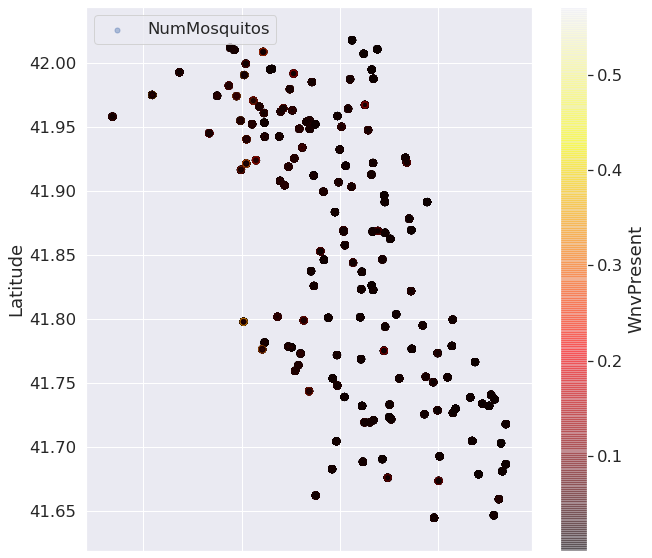

In [68]:
sub.plot(kind='scatter', x= 'Longitude', y='Latitude', alpha=0.4,
             s=train['NumMosquitos'], label='NumMosquitos', figsize=(10,10),
            c ='WnvPresent', cmap = plt.get_cmap("hot"),colorbar=True)
plt.legend

#Size of circle = Number of Mosquitos
#Colour['Red'] = WNV Present

In [69]:
sub[['Longitude', 'Latitude']][sub.WnvPresent>0.5].drop_duplicates().shape

(4, 2)

In [70]:
sub.head()

Id  WnvPresent  Latitude  Longitude
0   1    0.000810  41.95469 -87.800991
1   2    0.000720  41.95469 -87.800991
2   3    0.000933  41.95469 -87.800991
3   4    0.000145  41.95469 -87.800991
4   5    0.000047  41.95469 -87.800991

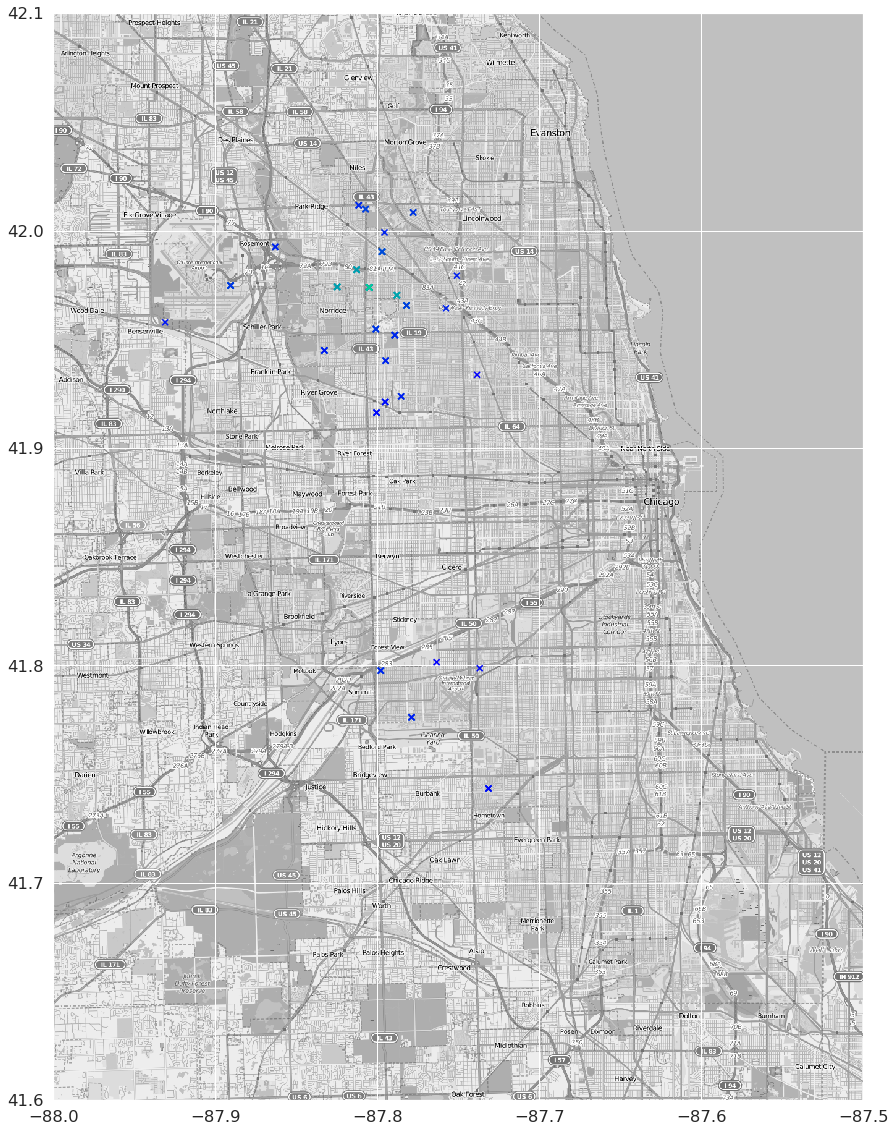

In [71]:
mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")
# traps = pd.read_csv('../data/merged_test.csv')[['Date', 'Trap','Longitude', 'Latitude']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(20,20))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


locations = sub[['Longitude', 'Latitude']].drop_duplicates().values
l2 = sub[['Longitude', 'Latitude','WnvPresent']][sub.WnvPresent>0.3].drop_duplicates().values

plt.scatter(l2[:,0], l2[:,1], marker='x',
           c = l2[:,2], cmap = plt.get_cmap("winter"))
# plt.scatter(locations[:,0], locations[:,1], marker='o',
#            c = locations[:,1], cmap = plt.get_cmap("winter"))


plt.savefig('heatmap.png')

In [72]:
#Export this file to do cost analysis
sub.to_csv('../data/sub_cba.csv',index=False)

In [73]:
sub['AddressNumberAndStreet']=test2['AddressNumberAndStreet']

In [74]:
#Explore the coefficients of the Logreg model
coef = pd.DataFrame(LogReg.coef_, columns=X.columns).T
coef

0
Latitude                     0.003848
Longitude                    0.004636
AddressAccuracy              0.168589
year                        -0.025836
month                        0.129994
week                         0.501889
Tmax                         0.055488
Tmin                         0.001778
Tavg                         0.046335
Depart                      -0.108032
DewPoint                    -0.019796
WetBulb                      0.006425
PrecipTotal                  0.006986
StnPressure                 -0.008013
ResultSpeed                  0.022451
ResultDir                    0.003835
AvgSpeed                     0.041769
Tmax_wkly                   -0.010724
Tmin_wkly                    0.058917
Tavg_wkly                    0.014748
Depart_wkly                 -0.235096
DewPoint_wkly                0.175256
WetBulb_wkly                 0.143345
PrecipTotal_wkly            -0.034972
StnPressure_wkly             0.004471
ResultSpeed_wkly             0.072003
ResultDir_wkly               0.002737
AvgSpeed_wkly                0.014039
CULEX ERRATICUS             -0.000219
CULEX PIPIENS                0.099041
CULEX PIPIENS/RESTUANS       0.015935
CULEX RESTUANS              -0.088877
CULEX SALINARIUS            -0.006029
CULEX TARSALIS              -0.000608
CULEX TERRITANS             -0.019593
Daylight Hours              -0.072459
Days between Spray and Test  0.000358
Has been Sprayed             0.019861

In [75]:
#Explore the areas prone to the virus
sub1 = sub.sort_values(by='WnvPresent', ascending = False)
sub1.head(100)

Id  WnvPresent   Latitude  Longitude  \
110022  110023    0.571395  41.973845 -87.805059   
109453  109454    0.523595  41.970248 -87.787992   
110025  110026    0.521614  41.973845 -87.805059   
110026  110027    0.521614  41.973845 -87.805059   
110020  110021    0.517603  41.973845 -87.805059   
108983  108984    0.517088  41.974089 -87.824812   
109113  109114    0.517088  41.981964 -87.812827   
109456  109457    0.473379  41.970248 -87.787992   
109457  109458    0.473379  41.970248 -87.787992   
109451  109452    0.469375  41.970248 -87.787992   
109117  109118    0.466884  41.981964 -87.812827   
109116  109117    0.466884  41.981964 -87.812827   
108987  108988    0.466884  41.974089 -87.824812   
108986  108987    0.466884  41.974089 -87.824812   
109111  109112    0.462887  41.981964 -87.812827   
108981  108982    0.462887  41.974089 -87.824812   
110110  110111    0.455763  41.965571 -87.781978   
57363    57364    0.455321  41.974089 -87.824812   
58291    58292    0.449265  41.974689 -87.890615   
58290    58291    0.449265  41.974689 -87.890615   
58289    58290    0.449265  41.974689 -87.890615   
58288    58289    0.449265  41.974689 -87.890615   
109921  109922    0.444352  41.974689 -87.890615   
109920  109921    0.444352  41.974689 -87.890615   
109925  109926    0.444352  41.974689 -87.890615   
109926  109927    0.444352  41.974689 -87.890615   
109924  109925    0.444352  41.974689 -87.890615   
109923  109924    0.444352  41.974689 -87.890615   
109922  109923    0.444352  41.974689 -87.890615   
108966  108967    0.440086  41.954690 -87.800991   
108967  108968    0.440086  41.954690 -87.800991   
110021  110022    0.437636  41.973845 -87.805059   
109341  109342    0.427889  41.990284 -87.797127   
110118  110119    0.421751  41.951878 -87.789234   
109622  109623    0.420716  41.797616 -87.797894   
109452  109453    0.419931  41.970248 -87.787992   
109445  109446    0.416724  41.923738 -87.785288   
109486  109487    0.416724  41.940160 -87.794896   
108982  108983    0.413594  41.974089 -87.824812   
109112  109113    0.413594  41.981964 -87.812827   
109731  109732    0.412518  41.776156 -87.778927   
57715    57716    0.410443  41.990284 -87.797127   
57491    57492    0.408617  41.981964 -87.812827   
109121  109122    0.406226  41.944869 -87.832763   
109122  109123    0.406226  41.944869 -87.832763   
58276    58277    0.404579  41.992478 -87.862995   
58388    58389    0.401441  41.973845 -87.805059   
57723    57724    0.400875  42.008314 -87.777921   
57499    57500    0.394652  41.944869 -87.832763   
110108  110109    0.390752  41.965571 -87.781978   
109269  109270    0.388278  41.916265 -87.800515   
109373  109374    0.388278  41.921177 -87.795180   
110030  110031    0.384198  41.743402 -87.731435   
57827    57828    0.379865  41.970248 -87.787992   
109915  109916    0.379832  41.974689 -87.890615   
109345  109346    0.379539  41.990284 -87.797127   
109344  109345    0.379539  41.990284 -87.797127   
110126  110127    0.379243  42.009876 -87.807277   
108962  108963    0.375767  41.954690 -87.800991   
108963  108964    0.375767  41.954690 -87.800991   
108964  108965    0.375767  41.954690 -87.800991   
109339  109340    0.375763  41.990284 -87.797127   
106281  106282    0.367930  41.973845 -87.805059   
110113  110114    0.366852  41.965571 -87.781978   
110114  110115    0.366852  41.965571 -87.781978   
58476    58477    0.361808  41.965571 -87.781978   
110116  110117    0.358397  41.951878 -87.789234   
109620  109621    0.357421  41.797616 -87.797894   
109929  109930    0.356211  41.974689 -87.890615   
109930  109931    0.356211  41.974689 -87.890615   
15511    15512    0.353862  41.974689 -87.890615   
109349  109350    0.353781  42.008314 -87.777921   
57507    57508    0.353340  42.011601 -87.811506   
108970  108971    0.352254  41.954690 -87.800991   
108971  108972    0.352254  41.954690 -87.800991   
109729  109730    0.349712  41.776156 -87.778927   
106278  